## load and transform data

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic3.csv')

# replace placeholders and set datatype
data = data.replace('?', np.nan)
data = data.astype({'age': np.float64, 'fare': np.float64})


## plot data

<AxesSubplot:xlabel='survived', ylabel='fare'>

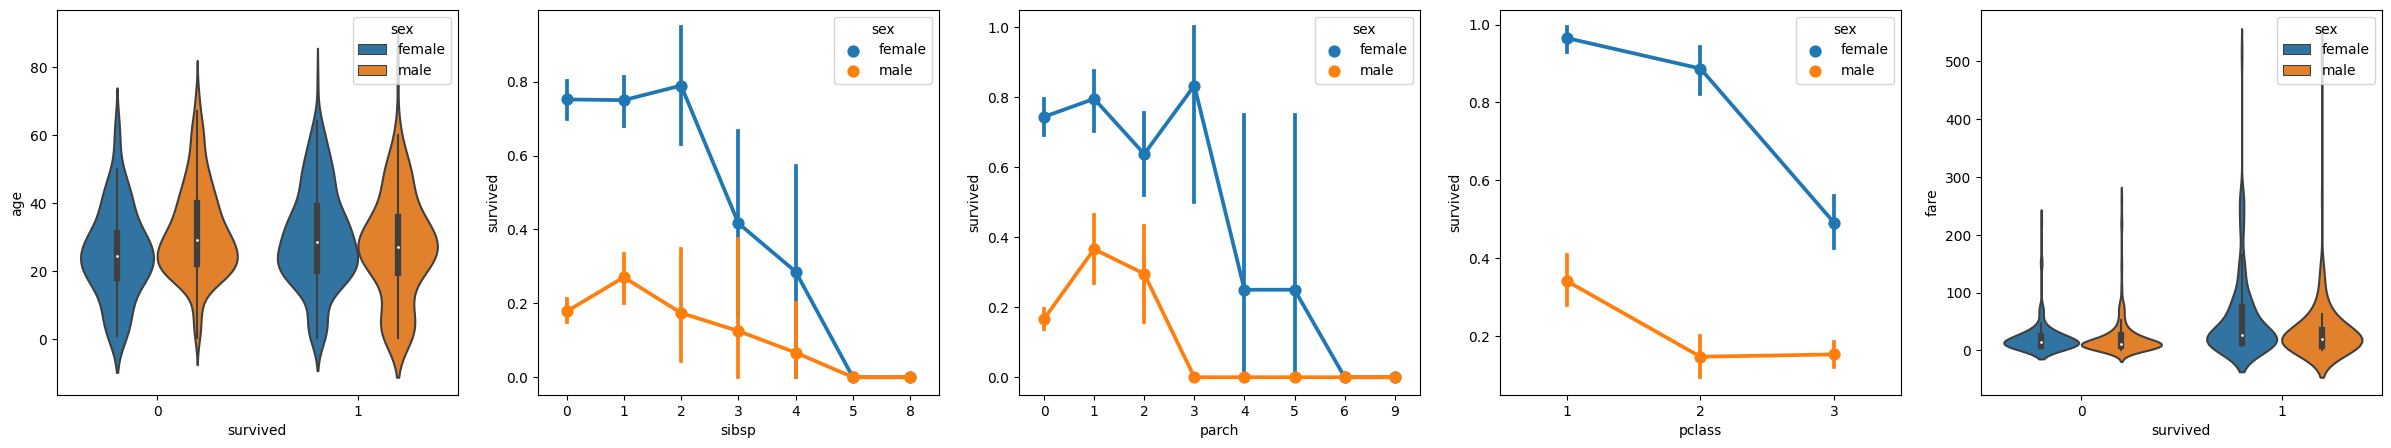

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

## calculate correlation

In [12]:
# make numeric
data = data.replace({'male': 1, 'female': 0})
data['relatives'] = ((data['sibsp'] + data['parch']) > 0).astype(int)

data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relative,0.201719
relatives,0.201719


## train and evaluate model

In [13]:
# keep necessary fields
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()